<a href="https://colab.research.google.com/github/Suchitra-V31/Machine-learning-projects/blob/main/Bank_Note_Authenciation_with_100_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bank Note Authenciation**

In this notebook we are going to find whether the bank note is fake or not using Logistic Regression.

**Data** were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.



Let us first import all the necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Data**

In [3]:
data=pd.read_csv('/content/BankNote_Authentication.csv')

In [4]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


let us get some information from the data.

In [5]:
data.shape

(1372, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


**Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


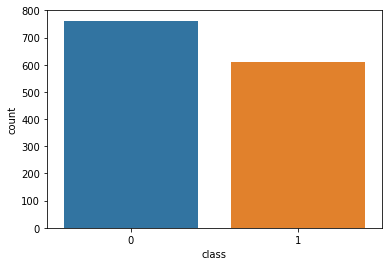

In [33]:
sns.countplot(data['class'])

From this we could see that our dataset has more fake notes than real notes.

Let us find the distribution of data using hist plot.

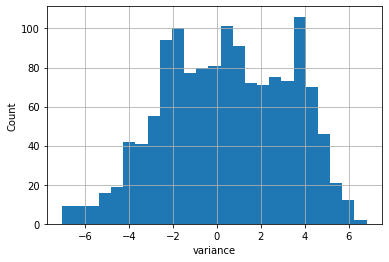

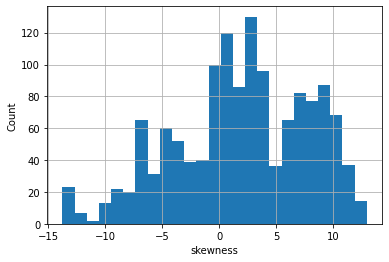

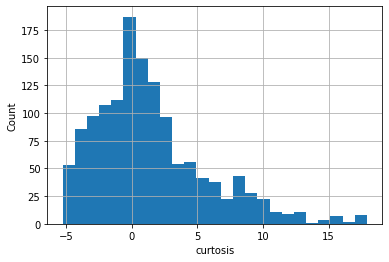

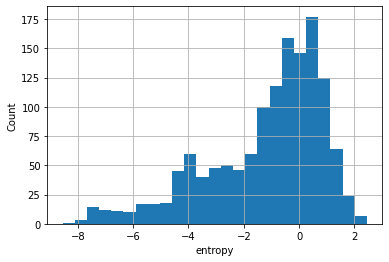

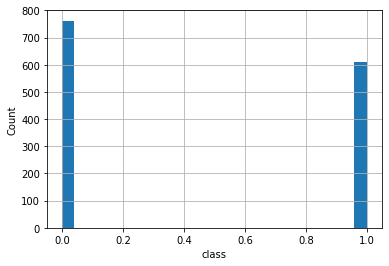

In [13]:
for feature in data.columns:
  df=data.copy()
  df[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.show()
  

Let us find the correlation of the data.

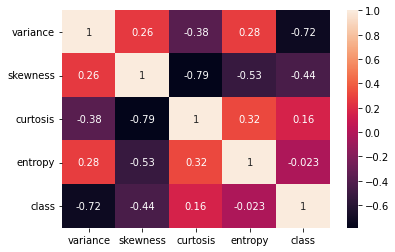

In [15]:
sns.heatmap(data.corr(),annot=True)

**Split the data into dependent and independent feature**

In [17]:
X=data.drop(['class'],axis=1)
y=data['class']

**Standardize the features using Standard Scaler**



In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()

In [20]:
X_scaled=scaler.fit_transform(X)

**Split the data into train/test**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=0)

**Using Logistic Regression with KFold**

In [25]:
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn.model_selection import KFold

In [24]:
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

In [26]:
for train,test in kfold.split(X_scaled,y):
  lr=LogisticRegression()
  model=lr.fit(X_scaled[train],y[train])
  pred=model.predict(X_scaled[test])

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print('Confusion matrix:\n',confusion_matrix(y[test],pred))
print('Classification Report:\n',classification_report(y[test],pred))

Confusion matrix:
 [[72  0]
 [ 0 65]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        65

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



We could see that our data has performed with **100%** accuracy.